In [75]:
#uncomment below line if skrebate is not installed
#pip install skrebate

## Importing Libraries

In [0]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.model_selection import cross_val_score

## Importing CSV files

In [0]:
data_df = pd.read_csv("faults.csv")


In [78]:
print("Data Description:")
print(data_df.describe())
print("The first 5 rows of the dataset:")
data_df.head(5)

Data Description:
         X_Minimum    X_Maximum  ...        Bumps  Other_Faults
count  1941.000000  1941.000000  ...  1941.000000   1941.000000
mean    571.136012   617.964451  ...     0.207110      0.346728
std     520.690671   497.627410  ...     0.405339      0.476051
min       0.000000     4.000000  ...     0.000000      0.000000
25%      51.000000   192.000000  ...     0.000000      0.000000
50%     435.000000   467.000000  ...     0.000000      0.000000
75%    1053.000000  1072.000000  ...     0.000000      1.000000
max    1705.000000  1713.000000  ...     1.000000      1.000000

[8 rows x 34 columns]
The first 5 rows of the dataset:


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [79]:
#splitting the dataframe into 60:20:20 ratio
train_df, valid_df, test_df = np.split(data_df.sample(frac=1), [int(.6*len(data_df)), int(.8*len(data_df))])
train_df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1164.000000,1164.000000,1.164000e+03,1.164000e+03,1164.000000,1164.000000,1164.000000,1.164000e+03,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,565.695876,611.284364,1.617495e+06,1.617555e+06,1831.233677,109.620275,85.810997,1.967499e+05,84.060137,129.601375,1459.243986,0.395189,0.604811,80.015464,0.326968,0.412786,0.563581,0.032553,0.607923,0.819133,0.568299,2.504562,1.336766,1.413027,0.090127,-0.135388,0.595271,0.079038,0.102234,0.195876,0.036942,0.031787,0.203608,0.350515
std,519.884896,497.271424,1.798631e+06,1.798651e+06,5622.240091,349.515993,540.245959,5.177535e+05,31.434516,17.822837,145.497146,0.489101,0.489101,56.781851,0.297794,0.135433,0.270252,0.056033,0.239902,0.231428,0.483894,0.776772,0.474239,0.450297,0.505501,0.142923,0.338953,0.269914,0.303086,0.397044,0.188699,0.175508,0.402854,0.477336
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.550000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000,0.000000,0.301000,0.301000,0.000000,-0.973900,-0.860300,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.434655e+05,4.434975e+05,89.750000,15.000000,14.000000,1.001700e+04,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.313100,0.357100,0.006600,0.406150,0.600000,0.000000,1.953000,1.000000,1.079200,-0.321975,-0.197150,0.258300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,397.500000,445.000000,1.137330e+06,1.137340e+06,184.500000,27.000000,26.000000,2.012750e+04,89.500000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.221450,0.413450,0.546900,0.010300,0.635050,0.956500,1.000000,2.266000,1.176100,1.342400,0.090900,-0.141250,0.528750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1056.250000,1076.250000,2.151245e+06,2.151420e+06,874.750000,85.500000,85.250000,8.446500e+04,105.000000,139.250000,1652.000000,1.000000,1.000000,80.000000,0.562975,0.498050,0.818200,0.023600,0.800000,1.000000,1.000000,2.941875,1.518500,1.748200,0.537825,-0.075325,0.999900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1688.000000,1694.000000,1.291703e+07,1.291709e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,192.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.591700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
print("Training Data Information:")
train_df.info()

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 414 to 1599
Data columns (total 34 columns):
X_Minimum                1164 non-null int64
X_Maximum                1164 non-null int64
Y_Minimum                1164 non-null int64
Y_Maximum                1164 non-null int64
Pixels_Areas             1164 non-null int64
X_Perimeter              1164 non-null int64
Y_Perimeter              1164 non-null int64
Sum_of_Luminosity        1164 non-null int64
Minimum_of_Luminosity    1164 non-null int64
Maximum_of_Luminosity    1164 non-null int64
Length_of_Conveyer       1164 non-null int64
TypeOfSteel_A300         1164 non-null int64
TypeOfSteel_A400         1164 non-null int64
Steel_Plate_Thickness    1164 non-null int64
Edges_Index              1164 non-null float64
Empty_Index              1164 non-null float64
Square_Index             1164 non-null float64
Outside_X_Index          1164 non-null float64
Edges_X_Index            1164 non-null float64

## To check if any data is actually missing

In [81]:
total = data_df.isnull().sum().sort_values(ascending=False)
percent_1 = data_df.isnull().sum()/data_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Other_Faults,0,0.0
Minimum_of_Luminosity,0,0.0
Edges_Index,0,0.0
Steel_Plate_Thickness,0,0.0
TypeOfSteel_A400,0,0.0


There are no null values, so no need to impute any values

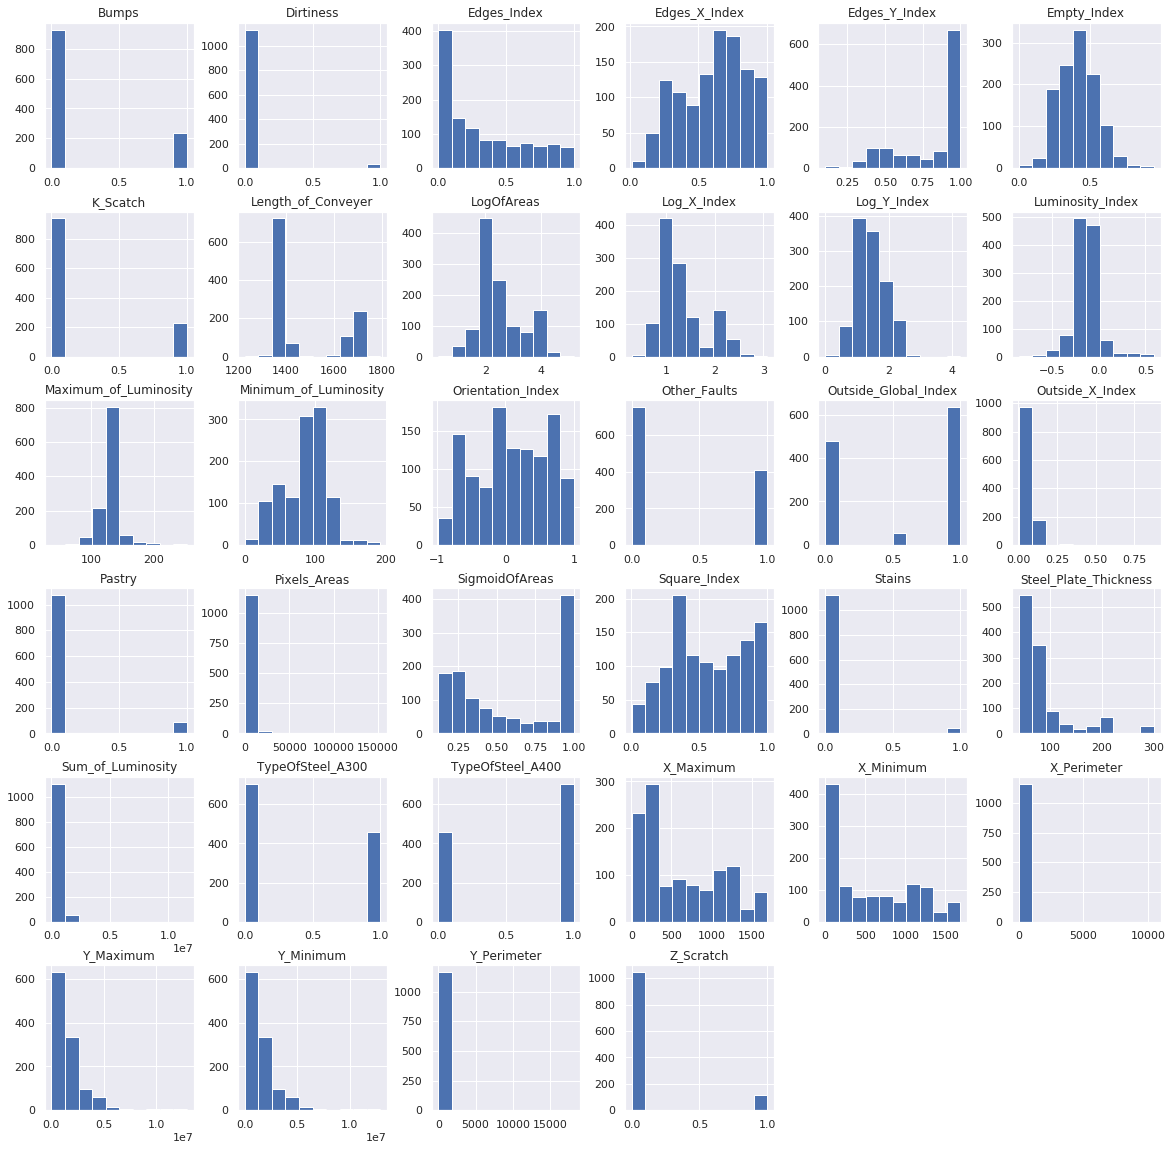

In [82]:
train_df.hist(figsize=(20,20))
plt.show()

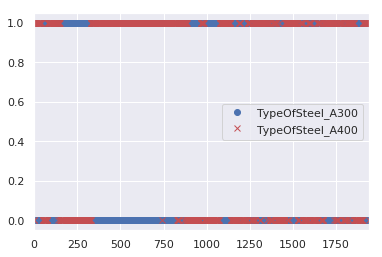

In [83]:
train_df[["TypeOfSteel_A300","TypeOfSteel_A400"]].plot(style=['o','rx'])

Looks like the 2 types are complimentary, either Red and Blue are always opposite. Lets be sure about that from the following code:

In [84]:
if(np.unique(train_df["TypeOfSteel_A300"]+train_df["TypeOfSteel_A400"])==1):
  print("Type A300 and A400 are complimentary")
else:
  print("Types are not complimentary")


Type A300 and A400 are complimentary


This is a One Hot Encoding, need to make one column out of it:

In [85]:
# as the two types are complimentary, we are merging them in train, test and valid

train_df = train_df.drop("TypeOfSteel_A300",axis=1)
train_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

valid_df = valid_df.drop("TypeOfSteel_A300",axis=1)
valid_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

test_df = test_df.drop("TypeOfSteel_A300",axis=1)
test_df.rename(columns = {'TypeOfSteel_A400':'TypeofSteel'}, inplace = True) # 0: A300, 1: A400

train_df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
414,39,222,855369,855569,18203,696,480,2155986,25,143,1398,1,40,0.0558,0.5027,0.9150,0.1309,0.2629,0.4167,1.0,4.2601,2.2624,2.3010,0.0850,-0.0747,1.0000,0,0,1,0,0,0,0
674,41,214,2566935,2566997,6075,242,131,633606,47,127,1358,1,40,0.0604,0.4336,0.3584,0.1274,0.7149,0.4733,0.0,3.7836,2.2380,1.7924,-0.6416,-0.1852,1.0000,0,0,1,0,0,0,0
510,41,194,2339627,2339797,9183,602,355,1059263,40,141,1404,1,40,0.0584,0.6469,0.9000,0.1090,0.2542,0.4789,1.0,3.9630,2.1847,2.2304,0.1000,-0.0988,1.0000,0,0,1,0,0,0,0
1703,208,228,134103,134190,952,79,90,83708,77,103,1394,1,220,0.2984,0.4529,0.2299,0.0143,0.2532,0.9667,1.0,2.9786,1.3010,1.9395,0.7701,-0.3131,0.9999,0,0,0,0,0,0,1
242,225,241,1301932,1301945,85,23,16,8566,93,111,1358,0,70,0.3314,0.5914,0.8125,0.0118,0.6956,0.8125,0.0,1.9294,1.2041,1.1139,-0.1875,-0.2127,0.3479,0,1,0,0,0,0,0


Converting the One Hot Encoding of all the 7 faults into a single column "label"

In [86]:
name=["Training","Validation","Testing"]
dataset=[train_df,valid_df,test_df]
label_code={0:"Pastry",1:"Z_Scratch",2:"K_Scatch",3:"Stains",4:"Dirtiness",5:"Bumps",6:"Other_Faults"}
i=0
for data in dataset:
  data["label"]=0
  
  data.loc[data['Pastry'] == 1, 'label'] = 0
  data.loc[data['Z_Scratch'] == 1, 'label'] = 1
  data.loc[data['K_Scatch'] == 1, 'label'] = 2
  data.loc[data['Stains'] == 1, 'label'] = 3
  data.loc[data['Dirtiness'] == 1, 'label'] = 4
  data.loc[data['Bumps'] == 1, 'label'] = 5
  data.loc[data['Other_Faults'] == 1, 'label'] = 6
  data=data.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1)
  print("5 samples of "+name[i]+" dataset now:")
  i=i+1
  print(data.head())

5 samples of Training dataset now:
      X_Minimum  X_Maximum  Y_Minimum  ...  Luminosity_Index  SigmoidOfAreas  label
414          39        222     855369  ...           -0.0747          1.0000      2
674          41        214    2566935  ...           -0.1852          1.0000      2
510          41        194    2339627  ...           -0.0988          1.0000      2
1703        208        228     134103  ...           -0.3131          0.9999      6
242         225        241    1301932  ...           -0.2127          0.3479      1

[5 rows x 27 columns]
5 samples of Validation dataset now:
      X_Minimum  X_Maximum  Y_Minimum  ...  Luminosity_Index  SigmoidOfAreas  label
101        1554       1564    3375744  ...           -0.2213          0.3509      0
124           5         13    1137189  ...           -0.1485          0.3601      0
272          49         75    1736811  ...           -0.1645          0.4729      1
1803       1033       1045     938565  ...           -0.2232     

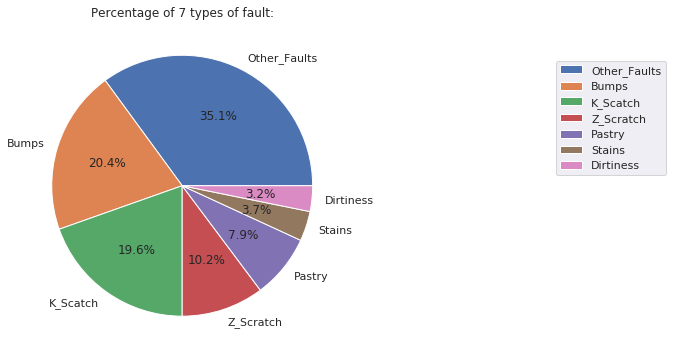

In [87]:
code,count=train_df["label"].value_counts().index,train_df["label"].value_counts().values
x,y=[label_code[i] for i in code],count

sns.set(rc={'figure.figsize':(8,6)})
ax = plt.pie(y, labels=x,autopct='%1.1f%%')
ax = plt.legend(loc="best", bbox_to_anchor=(2.0, 0.9, 0, 0))
ax = plt.title("Percentage of 7 types of fault:")



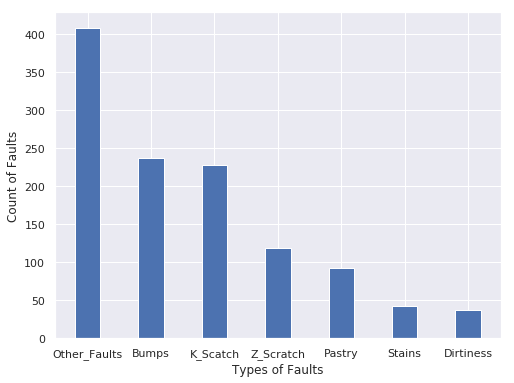

In [88]:
plt.bar(x,y,align='center',width=0.4) # A bar chart
plt.xlabel('Types of Faults')
plt.ylabel('Count of Faults')
plt.show()

As can be seen, "Other_Faults" and "Bumps" are the highest. The above Histogram shows the faults in descending order.

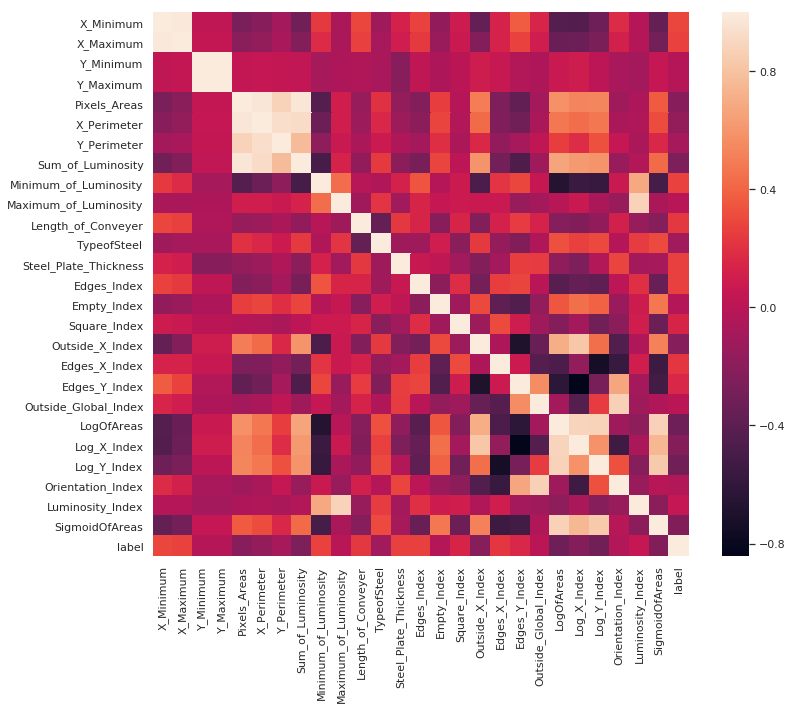

In [89]:
sns.set(rc={'figure.figsize':(12,10)})
corr = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

From the above heat map, it looks like the following features have high co-relation (lighter shade) with "label":


*   X_Minimum
*   X_Maximum

*   Minimum_of_Luminosity
*   Length_of_Conveyor

*   Steel_Plate_Thickness
*   Edges_Index
*   Edges_X_Index







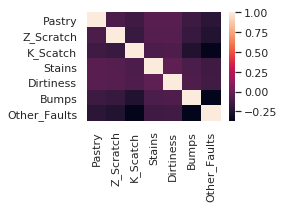

In [90]:
sns.set(rc={'figure.figsize':(3,2)})
corr = train_df[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

The 7 faults (labels) do not have any mentionable co-relation amongst each other.

***(X_Minimum and X_Maximum) and (Y_Minimum and Y_Maximum) are highly correlated and hence we will take X_Avg and Y_Avg instead to capture both the info. Also, Avg_Luminosity will take place of Minimum_of_Luminosity and Maximum_of_Luminosity.***

In [0]:
tr_f,v_f,te_f=train_df,valid_df,test_df

In [0]:
train_df,valid_df,test_df=tr_f,v_f,te_f

In [93]:
print("The size of the Training set before change is ",train_df.shape)
train_df["X_Avg"] = (train_df["X_Minimum"]+train_df["X_Maximum"])/2
train_df["Y_Avg"] = (train_df["Y_Minimum"]+train_df["Y_Maximum"])/2
train_df["Avg_Luminosity"] = (train_df["Minimum_of_Luminosity"]+train_df["Maximum_of_Luminosity"])/2
train_df = train_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Training set after modification is ",train_df.shape)
print("---------------------------------------------------------------------")
print("The size of the Validation set before change is ",valid_df.shape)
valid_df["X_Avg"] = (valid_df["X_Minimum"]+valid_df["X_Maximum"])/2
valid_df["Y_Avg"] = (valid_df["Y_Minimum"]+valid_df["Y_Maximum"])/2
valid_df["Avg_Luminosity"] = (valid_df["Minimum_of_Luminosity"]+valid_df["Maximum_of_Luminosity"])/2
valid_df = valid_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Validation set after modification is ",valid_df.shape)
print("-------------------------------------------------------------")
print("The size of the Training set before change is ",test_df.shape)
test_df["X_Avg"] = (test_df["X_Minimum"]+test_df["X_Maximum"])/2
test_df["Y_Avg"] = (test_df["Y_Minimum"]+test_df["Y_Maximum"])/2
test_df["Avg_Luminosity"] = (test_df["Minimum_of_Luminosity"]+test_df["Maximum_of_Luminosity"])/2
test_df = test_df.drop(["X_Minimum","X_Maximum","Y_Minimum","Y_Maximum","Minimum_of_Luminosity","Maximum_of_Luminosity"],axis=1)
print("The size of the Training set after modification is ",test_df.shape)

The size of the Training set before change is  (1164, 34)
The size of the Training set after modification is  (1164, 31)
---------------------------------------------------------------------
The size of the Validation set before change is  (388, 34)
The size of the Validation set after modification is  (388, 31)
-------------------------------------------------------------
The size of the Training set before change is  (389, 34)
The size of the Training set after modification is  (389, 31)


In [94]:
train_df.shape

(1164, 31)

***X_Perimeter, Y_Perimeter and Sum_of_Luminosity are highly correalated to Pixel_Areas, so will keep only Pixel_Areas.
Outside_X_Index is highly correlated to many other features, hence dropping it.
Outside_Global_Index is highly correlated to Orientation_Index, hence dropping it.
SigmoidOfAreas, Log_X_Index and Log_Y_Index are highly correlated to LogOfAreas, hence dropping them.***  

In [95]:
print("The size of the Training set before change is ",train_df.shape)  
train_df = train_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Training set after modification is ",train_df.shape)
print("-------------------------------------------------------------")
print("The size of the Validation set before change is ",valid_df.shape)  
valid_df = valid_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Validation set after modification is ",valid_df.shape)
print("-------------------------------------------------------------")
print("The size of the Testing set before change is ",test_df.shape)  
test_df = test_df.drop(["X_Perimeter","Y_Perimeter","Sum_of_Luminosity","Outside_X_Index",
                  "Outside_Global_Index","SigmoidOfAreas","Log_X_Index","Log_Y_Index"],axis=1)
print("The size of the Testing set after modification is ",test_df.shape)


The size of the Training set before change is  (1164, 31)
The size of the Training set after modification is  (1164, 23)
-------------------------------------------------------------
The size of the Validation set before change is  (388, 31)
The size of the Validation set after modification is  (388, 23)
-------------------------------------------------------------
The size of the Testing set before change is  (389, 31)
The size of the Testing set after modification is  (389, 23)


In [96]:
train_df.columns

Index(['Pixels_Areas', 'Length_of_Conveyer', 'TypeofSteel',
       'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Orientation_Index',
       'Luminosity_Index', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults', 'label', 'X_Avg', 'Y_Avg',
       'Avg_Luminosity'],
      dtype='object')

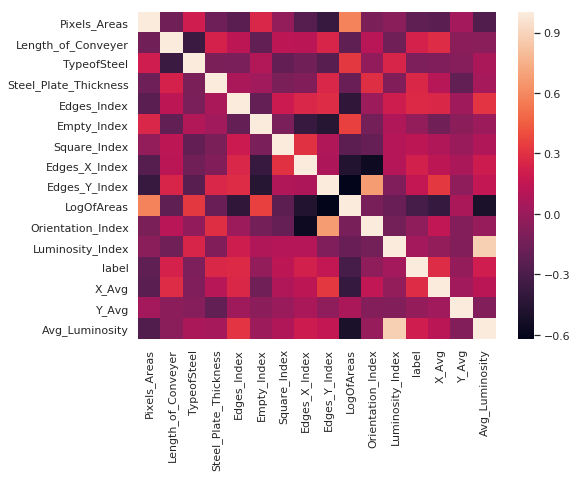

In [97]:
sns.set(rc={'figure.figsize':(8,6)})
corr = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"], axis=1).corr()
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Correlation between all the features are much reduced, which shows all these features are important.

# **Splitting the features and labels**

In [98]:
#separating features and labels of tarining, validation and test set

train_fea = train_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
train_label = train_df["label"]

valid_fea = valid_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
valid_label = valid_df["label"]

test_fea = test_df.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults","label"], axis=1)
test_label = test_df["label"]

train_fea.head()


,Pixels_Areas,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Orientation_Index,Luminosity_Index,X_Avg,Y_Avg,Avg_Luminosity
414,18203,1398,1,40,0.0558,0.5027,0.9150,0.2629,0.4167,4.2601,0.0850,-0.0747,130.5,855469.0,84.0
674,6075,1358,1,40,0.0604,0.4336,0.3584,0.7149,0.4733,3.7836,-0.6416,-0.1852,127.5,2566966.0,87.0
510,9183,1404,1,40,0.0584,0.6469,0.9000,0.2542,0.4789,3.9630,0.1000,-0.0988,117.5,2339712.0,90.5
1703,952,1394,1,220,0.2984,0.4529,0.2299,0.2532,0.9667,2.9786,0.7701,-0.3131,218.0,134146.5,90.0
242,85,1358,0,70,0.3314,0.5914,0.8125,0.6956,0.8125,1.9294,-0.1875,-0.2127,233.0,1301938.5,102.0


# **Standardisation of Feature datasets**

In [99]:
dataset=[train_fea,train_label,valid_fea,valid_label,test_fea,test_label]
def stand(df):
  x = df.values #returns a numpy array
  col=df.columns
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df[col]=x_scaled
  return df

for i in range(0,len(dataset),2):  # standardizing only features
  dataset[i]=stand(dataset[i])
  
train_fea.head()

,Pixels_Areas,Length_of_Conveyer,TypeofSteel,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Edges_X_Index,Edges_Y_Index,LogOfAreas,Orientation_Index,Luminosity_Index,X_Avg,Y_Avg,Avg_Luminosity
414,0.119231,0.301587,1.0,0.000000,0.056069,0.532578,0.914289,0.252131,0.348268,0.810842,0.538716,0.541047,0.076081,0.065742,0.356948
674,0.039783,0.231041,1.0,0.000000,0.060691,0.459371,0.353030,0.710735,0.411508,0.713253,0.169058,0.464945,0.074304,0.198310,0.373297
510,0.060143,0.312169,1.0,0.000000,0.058682,0.685348,0.899163,0.243304,0.417765,0.749995,0.546347,0.524449,0.068384,0.180707,0.392371
1703,0.006223,0.294533,1.0,0.692308,0.299839,0.479818,0.223455,0.242289,0.962793,0.548385,0.887261,0.376860,0.127886,0.009870,0.389646
242,0.000544,0.231041,0.0,0.115385,0.332998,0.626549,0.810931,0.691153,0.790503,0.333504,0.400081,0.446006,0.136767,0.100324,0.455041


In [100]:
'''clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestClassifier(n_estimators=100))
print(np.mean(cross_val_score(clf, train_fea, train_label)))'''

'clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),\n                    RandomForestClassifier(n_estimators=100))\nprint(np.mean(cross_val_score(clf, train_fea, train_label)))'

Referring to the paper: https://pdfs.semanticscholar.org/21d3/cdbf444f42d3854cad0cea1afe45cfc6ce0f.pdf

# PCA (Principal Component Analysis)

Current shape of Training dataset is  (1164, 15)


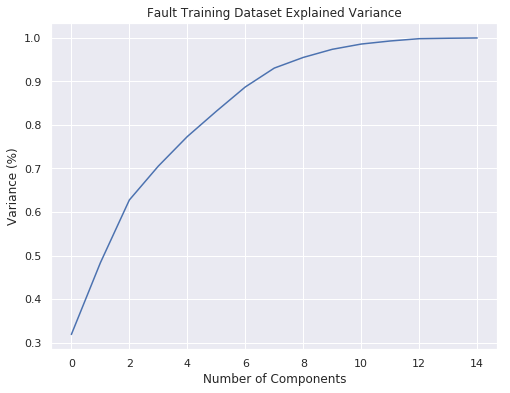

In [101]:
print("Current shape of Training dataset is ",train_fea.shape)
#Fitting the PCA algorithm with our Data
pca = PCA().fit(train_fea)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Fault Training Dataset Explained Variance')
plt.show()

This plot tells us that selecting 11 components we can preserve something around 98.8% or 99% of the total variance of the data. 
We should not use 100% of our variance, because it denotes all components, and we want only the principal ones.

In [102]:
pca = PCA(n_components=11)
train_pca = pca.fit_transform(train_fea)
print("Current shape of Training dataset is ",train_pca.shape)

Current shape of Training dataset is  (1164, 11)


# K-Means Clustering

In [0]:
def plot_cluster(dataset,label):
  c1,c2,c3,c4,c5,c6,c7=0,0,0,0,0,0,0
  for i in range(0, dataset.shape[0]):
    if label[i] == 0:
      c1 = plt.scatter(dataset[i,0],dataset[i,1],c='r', marker='+')
    elif label[i] == 1:
      c2 = plt.scatter(dataset[i,0],dataset[i,1],c='g', marker='o')
    elif label[i] == 2:
      c3 = plt.scatter(dataset[i,0],dataset[i,1],c='b', marker='*')
    elif label[i] == 3:
      c4 = plt.scatter(dataset[i,0],dataset[i,1],c='c', marker='s')
    elif label[i] == 4:
      c5 = plt.scatter(dataset[i,0],dataset[i,1],c='m', marker='D')
    elif label[i] == 5:
      c6 = plt.scatter(dataset[i,0],dataset[i,1],c='y', marker='v')
    elif label[i] == 6:
      c7 = plt.scatter(dataset[i,0],dataset[i,1],c='k', marker='^')
  return [c1, c2, c3,c4,c5,c6,c7][0:max(label)+1]

PCA applied dataset with their original labels (on left) and K Means clustering (7 clusters) applied on PCA applied dataset (on right)


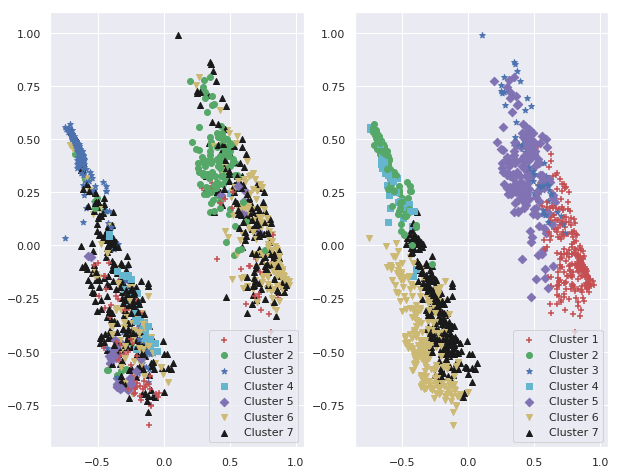

Dataset without PCA with their original labels (on left) and K Means clustering (7 clusters) applied on Dataset without PCA (on right)


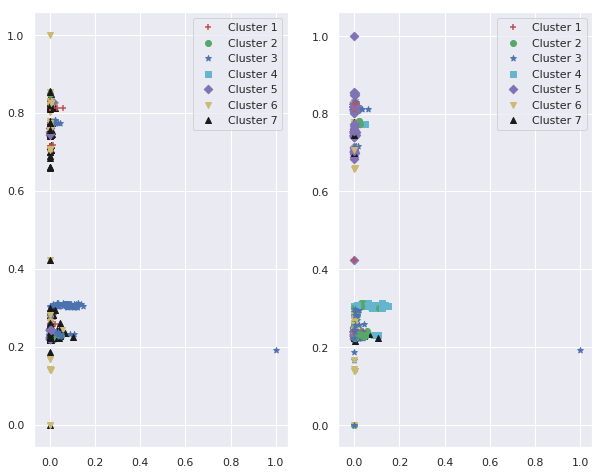

In [104]:
from sklearn.cluster import KMeans
sns.set(rc={'figure.figsize':(10,8)})

print("PCA applied dataset with their original labels (on left) and K Means clustering (7 clusters) applied on PCA applied dataset (on right)")

# PCA applied Dataset

#Original Labels
plt.subplot(1, 2, 1)
plt.legend(plot_cluster(train_pca,train_label.values), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])

#KMeans Labels
km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
km_pca = km.fit_predict(train_pca)
centroids_pca = km.cluster_centers_
labels_pca = km.labels_

plt.subplot(1, 2, 2)
plt.legend(plot_cluster(train_pca,labels_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])
plt.show()




print("Dataset without PCA with their original labels (on left) and K Means clustering (7 clusters) applied on Dataset without PCA (on right)")

# Non PCA applied Dataset (All features)

#Original Labels
plt.subplot(1, 2, 1)
plt.legend(plot_cluster(np.array(train_fea),train_label.values), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])

#KMeans Labels
km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
km_non_pca = km.fit_predict(train_fea)
centroids_non_pca = km.cluster_centers_
labels_non_pca = km.labels_

plt.subplot(1, 2, 2)
plt.legend(plot_cluster(np.array(train_fea),labels_non_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7'])
#plt.title('K Means clustering (7 clusters) applied on Dataset without PCA')
plt.show()

K Means clustering is an ***unsupervised machine learning algorithm***. As the model is unsupervised, it did not know which label (class 0 to 6) to assign to each class. Hence, we are going to change the class labels of the predicted values. We are not changing the any of the classification groups we are simply giving each group the correct number. We need to do this for measuring the performance.

In [0]:

def map_category(lab):
  modified_true_pca_label=[]
  for i in lab:
    if(i==0):
      modified_true_pca_label.append(2)
    elif(i==1):
      modified_true_pca_label.append(4)
    elif(i==2):
      modified_true_pca_label.append(5)
    elif(i==3):
      modified_true_pca_label.append(6)
    elif(i==4):
      modified_true_pca_label.append(1)
    elif(i==5):
      modified_true_pca_label.append(3)
    elif(i==6):
      modified_true_pca_label.append(0)
  return modified_true_pca_label


**The Elbow Method : tool to estimate the optimal number of clusters k**

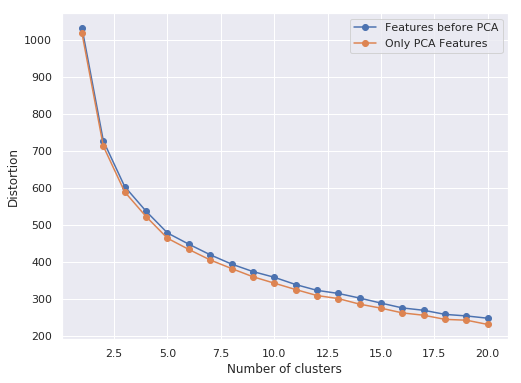

In [106]:
# calculate distortion for a range of number of cluster
distortion_pca,distortion_non_pca = [],[]
for i in range(1, 21):
    km_pca = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km_non_pca = KMeans(n_clusters=i, init='random',n_init=10, max_iter=300,tol=1e-04, random_state=0)
    km_non_pca.fit(train_fea)
    km_pca.fit(train_pca)
    distortion_pca.append(km_pca.inertia_)
    distortion_non_pca.append(km_non_pca.inertia_)

sns.set(rc={'figure.figsize':(8,6)})
# plot
plt.plot(range(1, 21), distortion_non_pca, marker='o',label="Features before PCA")
plt.plot(range(1, 21), distortion_pca, marker='o',label="Only PCA Features")
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


The Elbow Method helps in identifying the value of k where the distortion (within-cluster SSE) begins to decrease most rapidly. Both the graph suggests that **k should be around 3**.

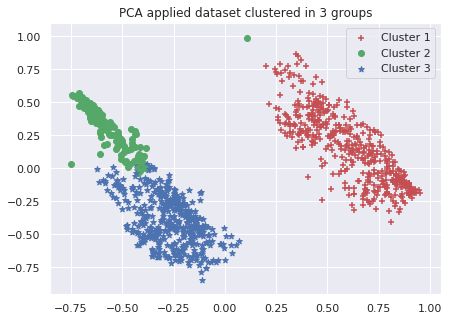

In [107]:
# Calculating K-Means considering cluster = 3
sns.set(rc={'figure.figsize':(7,5)})
km = KMeans(    n_clusters=3, init='random',    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0)
km_pca = km.fit_predict(train_pca)
centroids_pca = km.cluster_centers_
labels_pca = km.labels_

plt.legend(plot_cluster(train_pca,labels_pca), ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.title('PCA applied dataset clustered in 3 groups')
plt.show()

This shows that when we consider 3 clusters as suggested by the elbow method, the overlapping of cluster is much less and the clusters are quite distinctive compared to the earlier case where number of cluster was taken as 7.

However, for the calculation purpose, we are using the k=7 as we have that knowledge from the datasets domain.

**Score Calculation**

In [108]:
pca = PCA(n_components = 11)
pca.fit(train_fea)

print("PCA Calculation under progress for all 3 datasets...")
PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

train_pca = pca.transform(train_fea)
print("PCA applied successfully on Training set.")

valid_pca = pca.transform(valid_fea)
print("PCA applied successfully on Validation set.")


test_pca = pca.transform(test_fea)
print("PCA applied successfully on Testing set.")

actual_labels=[map_category(train_label.values),map_category(train_label.values),map_category(valid_label.values),map_category(valid_label.values),
              map_category(test_label.values),map_category(test_label.values)]
dataset=[train_pca,train_fea,valid_pca,valid_fea,test_pca,test_fea]
out=[" PCA applied Training "," Actual Training "," PCA applied Validation "," Actual Validation "," PCA applied Testing "," Actual Testing "]

i=0
for i in range(6):
  km = KMeans(    n_clusters=7, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
  km.fit_predict(dataset[i])
  centroids = km.cluster_centers_
  predicted_labels = km.labels_
  print("Accuracy Scores of",out[i],"set : ",accuracy_score(actual_labels[i], predicted_labels))
  i=i+1

PCA Calculation under progress for all 3 datasets...
PCA applied successfully on Training set.
PCA applied successfully on Validation set.
PCA applied successfully on Testing set.
Accuracy Scores of  PCA applied Training  set :  0.20876288659793815
Accuracy Scores of  Actual Training  set :  0.09020618556701031
Accuracy Scores of  PCA applied Validation  set :  0.22422680412371135
Accuracy Scores of  Actual Validation  set :  0.2268041237113402
Accuracy Scores of  PCA applied Testing  set :  0.10539845758354756
Accuracy Scores of  Actual Testing  set :  0.10282776349614396


In [109]:
dataset_pca=[train_pca,valid_pca,test_pca]
dataset_non_pca=[train_fea,valid_fea,test_fea]

i,arr2=0,[]
for i in range(0,3):
  df=dataset_pca[i]
  arr1=[]
  for n_clusters in range(2,11):
      clusterer = KMeans( n_clusters=n_clusters, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
      clusterer.fit(dataset_pca[0])
      preds = clusterer.predict(df)
      centers = clusterer.cluster_centers_

      score = silhouette_score (df, preds, metric='euclidean')
      arr1.append(score)
  i=i+1
  arr2.append(arr1)
score_pca=pd.DataFrame(arr2, columns = ["2","3","4","5","6","7","8","9","10"],index=["Train","Valid","Test"])
print("Silhouette Score for different n_cluster values trained on PCA applied features")
print(score_pca)

i,arr2=0,[]
for i in range(0,3):
  df=dataset_non_pca[i]
  arr1=[]
  for n_clusters in range(2,11):
      clusterer = KMeans( n_clusters=n_clusters, init='random',    n_init=10, max_iter=300, tol=1e-04, random_state=0)
      clusterer.fit(dataset_non_pca[0])
      preds = clusterer.predict(df)
      centers = clusterer.cluster_centers_

      score = silhouette_score (df, preds, metric='euclidean')
      arr1.append(score)
  i=i+1
  arr2.append(arr1)
score_non_pca=pd.DataFrame(arr2, columns = ["2","3","4","5","6","7","8","9","10"],index=["Train","Valid","Test"])
print("Silhouette Score for different n_cluster values trained on actual features")
print(score_non_pca)

Silhouette Score for different n_cluster values trained on PCA applied features
              2         3         4  ...         8         9        10
Train  0.296467  0.282782  0.279800  ...  0.274068  0.269406  0.258724
Valid  0.281427  0.275433  0.264040  ...  0.251176  0.255494  0.218964
Test   0.279893  0.260536  0.261495  ...  0.256601  0.275578  0.218383

[3 rows x 9 columns]
Silhouette Score for different n_cluster values trained on actual features
              2         3         4  ...         8         9        10
Train  0.292283  0.278433  0.275103  ...  0.272439  0.262793  0.269812
Valid  0.274171  0.272307  0.257476  ...  0.239965  0.244807  0.238735
Test   0.270950  0.256911  0.252997  ...  0.249994  0.264156  0.237053

[3 rows x 9 columns]


# SVM (Support Vector Machine)

**Tuning Parameters**
*   ***Kernel***: The learning of the hyperplane is done by transforming the problem using some algebra (Linear, Polynomial, Exponential)
*   ***Regularization Parameter***: It (often termed as C parameter in python’s sklearn library) informs the SVM optimization about how much we want to avoid misclassifying each training example.
*   ***Gamma***: If it is a high value, the points close to plausible separation line are considered in calculation. If low, far away points are also considered.
*   ***Margin***: It is a separation of line to the closest class points


In [110]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
import pandas as pd

clf = svm.SVC(gamma='auto')
clf.fit(train_fea, train_label)
confidence = clf.score(valid_fea, valid_label)
print("SVM Accuracy score for Validation set with basic model: ", confidence)

SVM Accuracy score for Validation set with basic model:  0.6056701030927835


**Tuning of C :**

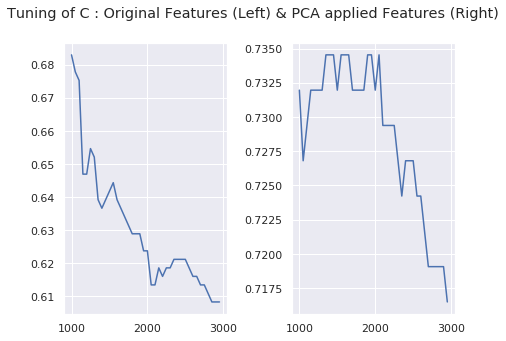

In [111]:
# original features
x,y=[],[]
max_x,max_y=0,0
for i in range(1000,3000,50):
  clf = svm.SVC(kernel="rbf", C = i,gamma='auto')
  clf.fit(train_fea, train_label)
  predicted_labels = clf.predict(valid_fea)
  x.append(i)
  y.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>max_y):
    max_y=accuracy_score(valid_label, predicted_labels)
    max_x=i
    
# PCA applied features
x1,y1=[],[]
max_x1,max_y1=0,0
for i in range(1000,3000,50):
  clf = svm.SVC(kernel="rbf", C = i,gamma='auto')
  clf.fit(train_pca, train_label)
  predicted_labels = clf.predict(valid_pca)
  x1.append(i)
  y1.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>max_y1):
    max_y1=accuracy_score(valid_label, predicted_labels)
    max_x1=i
#plt.plot(x,y)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Tuning of C : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(x, y)
ax2.plot(x1,y1)

In [112]:
print("We will choose C = ",max_x," for original features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.")
print("We will choose C = ",max_x1," for PCA applied features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.")

We will choose C =  1000  for original features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
We will choose C =  1350  for PCA applied features because for larger values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.


**Tuning of gamma :**

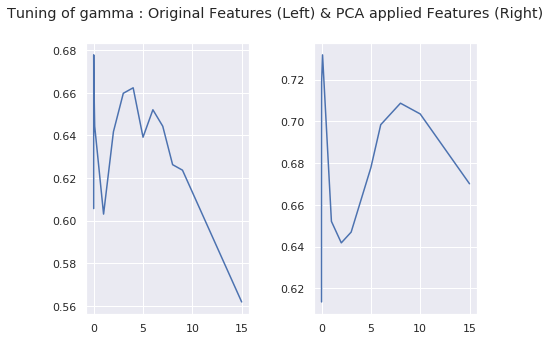

In [113]:
x,y=[0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15],[]
m1,m2=0,0
for i in x:
  clf = svm.SVC(kernel="rbf", C = max_x,gamma=i)
  clf.fit(train_fea, train_label)
  predicted_labels = clf.predict(valid_fea)
  y.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>m2):
    m2=accuracy_score(valid_label, predicted_labels)
    m1=i
#plt.plot(x,y)

x1,y1=[0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15],[]
m_1,m_2=0,0
for i in x1:
  clf = svm.SVC(kernel="rbf", C = max_x1,gamma=i)
  clf.fit(train_pca, train_label)
  predicted_labels = clf.predict(valid_pca)
  y1.append(accuracy_score(valid_label, predicted_labels))
  if(accuracy_score(valid_label, predicted_labels)>m_2):
    m_2=accuracy_score(valid_label, predicted_labels)
    m_1=i
#plt.plot(x1,y1)

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Tuning of gamma : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(x, y)
ax2.plot(x1,y1)

In [114]:
print("We will choose gamma = ",m1," for original features as the score is highest against it.")
print("We will choose gamma = ",m_1," for PCA applied features as the score is highest against it.")

We will choose gamma =  0.001  for original features as the score is highest against it.
We will choose gamma =  0.1  for PCA applied features as the score is highest against it.


In [0]:
def show_fscore(valid_label, predicted_labels):
  pr, rec, fs, unique_labels = precision_recall_fscore_support(valid_label, predicted_labels)
  print("The FScore of the 7 labels are as follows:")
  for i in range(0,7):
    print("Class ",i," : ",fs[i])
  print("Average FScore : ",sum(fs)/len(fs))

In [116]:
print("-------------------------------------------")
clf_fea = svm.SVC(kernel="rbf", C = max_x,gamma=m1)
clf_fea.fit(train_fea, train_label)
predicted_labels = clf_fea.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",accuracy_score(valid_label, predicted_labels))
show_fscore(valid_label,predicted_labels)

print("-------------------------------------------")
clf_pca = svm.SVC(kernel="rbf", C = max_x1,gamma=m_1)
clf_pca.fit(train_pca, train_label)
predicted_labels = clf_pca.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",accuracy_score(valid_label, predicted_labels))
show_fscore(valid_label,predicted_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6778350515463918
The FScore of the 7 labels are as follows:
Class  0  :  0.5432098765432098
Class  1  :  0.7692307692307692
Class  2  :  0.935064935064935
Class  3  :  0.9333333333333333
Class  4  :  0.0
Class  5  :  0.5771812080536913
Class  6  :  0.5945945945945945
Average FScore :  0.6218021024029333
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.7319587628865979
The FScore of the 7 labels are as follows:
Class  0  :  0.5454545454545455
Class  1  :  0.7727272727272727
Class  2  :  0.9419354838709677
Class  3  :  0.8235294117647058
Class  4  :  0.8571428571428572
Class  5  :  0.7045454545454545
Class  6  :  0.6271186440677965
Average FScore :  0.753207667081943


In [117]:
print("-------------------------------------------")
predicted_labels = clf_fea.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",accuracy_score(test_label, predicted_labels))
show_fscore(test_label,predicted_labels)

print("-------------------------------------------")
predicted_labels = clf_pca.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",accuracy_score(test_label, predicted_labels))
show_fscore(test_label,predicted_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6966580976863753
The FScore of the 7 labels are as follows:
Class  0  :  0.45714285714285713
Class  1  :  0.7246376811594203
Class  2  :  0.9039548022598871
Class  3  :  0.896551724137931
Class  4  :  0.0
Class  5  :  0.6097560975609757
Class  6  :  0.6641221374045801
Average FScore :  0.6080236142379503
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6812339331619537
The FScore of the 7 labels are as follows:
Class  0  :  0.5614035087719298
Class  1  :  0.6753246753246753
Class  2  :  0.891566265060241
Class  3  :  0.6666666666666666
Class  4  :  0.7000000000000001
Class  5  :  0.627027027027027
Class  6  :  0.6075949367088608
Average FScore :  0.675654725651343


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN Algorithm

This algorithm computes the distance between the new data with every training samples.
For computing the distance, Euclidean distance, Hamming distance or Manhattan distance are usually used.
Algo picks K entries in the database which are closest to the new data point.
Then it does the majority vote i.e the most common class/label among those K entries will be the class of the new data point.

**Optimizing value of K for KNN Algorithm**

Text(0, 0.5, 'Accuracy Score')

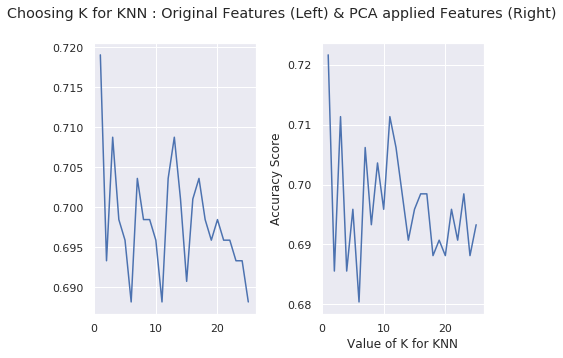

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_fea,train_label)
  predicted_label=knn.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(1,26):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_pca,train_label)
  predicted_label=knn.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing K for KNN : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(1,26), scores_list)
ax2.plot(range(1,26),scores_list_pca)
plt.xlabel("Value of K for KNN")
plt.ylabel("Accuracy Score")

In [119]:
print("We will choose K = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose K = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose K =  3  for original features as the score is highest against it.
We will choose K =  3  for PCA applied features as the score is highest against it.


The prediction is always accurate with K=1. At K=1, we are overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. The validation error curve is plotted to get the optimal value of K. This value of K will be used for all predictions.

In [120]:
print("-------------------------------------------")
knn_fea = KNeighborsClassifier(n_neighbors = 4)
knn_fea.fit(train_fea,train_label)
predicted_valid_label=knn_fea.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
knn_pca = KNeighborsClassifier(n_neighbors = 4)
knn_pca.fit(train_pca, train_label)
predicted_valid_labels = knn_pca.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6984536082474226
The FScore of the 7 labels are as follows:
Class  0  :  0.47457627118644063
Class  1  :  0.8444444444444444
Class  2  :  0.9308176100628931
Class  3  :  0.8275862068965518
Class  4  :  0.7692307692307692
Class  5  :  0.6033519553072625
Class  6  :  0.5897435897435898
Average FScore :  0.719964406695993
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6855670103092784
The FScore of the 7 labels are as follows:
Class  0  :  0.48275862068965514
Class  1  :  0.8409090909090908
Class  2  :  0.9
Class  3  :  0.75
Class  4  :  0.8333333333333333
Class  5  :  0.6162162162162163
Class  6  :  0.5589519650655022
Average FScore :  0.7117384608876852


In [121]:
print("-------------------------------------------")
knn_fea = KNeighborsClassifier(n_neighbors = 4)
knn_fea.fit(train_fea,train_label)
predicted_test_label=knn_fea.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
knn_pca = KNeighborsClassifier(n_neighbors = 4)
knn_pca.fit(train_pca, train_label)
predicted_test_labels = knn_pca.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.7172236503856041
The FScore of the 7 labels are as follows:
Class  0  :  0.5454545454545455
Class  1  :  0.7761194029850746
Class  2  :  0.9418604651162791
Class  3  :  0.9333333333333333
Class  4  :  0.56
Class  5  :  0.6631016042780747
Class  6  :  0.6147186147186147
Average FScore :  0.7192268522694174
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.7069408740359897
The FScore of the 7 labels are as follows:
Class  0  :  0.5151515151515151
Class  1  :  0.787878787878788
Class  2  :  0.9302325581395349
Class  3  :  0.8749999999999999
Class  4  :  0.5833333333333334
Class  5  :  0.6483516483516484
Class  6  :  0.6101694915254237
Average FScore :  0.7071596191971777


# Decision Tree

Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other).


*   **Impurities** : Impurity is when we have a traces of one class division into other. We tolerate some percentage of impurity (we stop further division) for faster performance. (There is always trade off between accuracy and performance).
*   **Entropy** : Entropy is degree of randomness of elements or in other words it is measure of impurity. [-sum(p(x)log p(x))]


*   **Information Gain** : If we have many features, on which feature's basis should we divide the plot is decided by the Information Gain



**Tuning min_samples_split for Decision Tree**

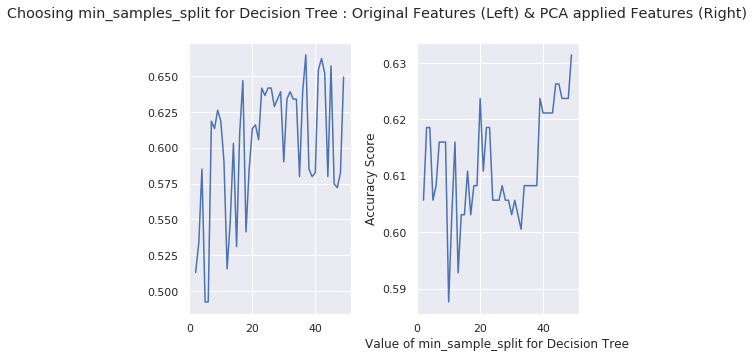

In [122]:
from sklearn import tree

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(2,50):
  model = tree.DecisionTreeClassifier(min_samples_split=k,criterion="entropy")
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(2,50):
  model = tree.DecisionTreeClassifier(min_samples_split=k,criterion="entropy")
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing min_samples_split for Decision Tree : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(2,50), scores_list)
ax2.plot(range(2,50),scores_list_pca)
plt.xlabel("Value of min_sample_split for Decision Tree")
plt.ylabel("Accuracy Score")

dt_split_fea,dt_split_pca=max_k_fea,max_k_pca

'entropy' gives better result that 'gini', hence going with 'entropy'.

In [123]:
print("We will choose min_samples_split = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose min_samples_split = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose min_samples_split =  37  for original features as the score is highest against it.
We will choose min_samples_split =  49  for PCA applied features as the score is highest against it.


In [124]:
print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_fea
                                    ,criterion="entropy")
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_pca
                                    ,criterion="entropy")
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.5876288659793815
The FScore of the 7 labels are as follows:
Class  0  :  0.5151515151515151
Class  1  :  0.5423728813559321
Class  2  :  0.8222222222222222
Class  3  :  0.4
Class  4  :  0.4444444444444444
Class  5  :  0.5492957746478874
Class  6  :  0.5311203319502075
Average FScore :  0.5435153099674584
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6314432989690721
The FScore of the 7 labels are as follows:
Class  0  :  0.3684210526315789
Class  1  :  0.7341772151898734
Class  2  :  0.8951048951048951
Class  3  :  0.8461538461538461
Class  4  :  0.4666666666666667
Class  5  :  0.5833333333333334
Class  6  :  0.5590551181102362
Average FScore :  0.6361303038843472


In [125]:
print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_fea,
                                    criterion="entropy")
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = tree.DecisionTreeClassifier(min_samples_split = max_k_pca,
                                    criterion="entropy")
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.5604113110539846
The FScore of the 7 labels are as follows:
Class  0  :  0.360655737704918
Class  1  :  0.6984126984126984
Class  2  :  0.847457627118644
Class  3  :  0.0
Class  4  :  0.16666666666666666
Class  5  :  0.37878787878787873
Class  6  :  0.5424836601307189
Average FScore :  0.4277806098316464
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6143958868894601
The FScore of the 7 labels are as follows:
Class  0  :  0.4235294117647058
Class  1  :  0.7666666666666667
Class  2  :  0.858974358974359
Class  3  :  0.5833333333333334
Class  4  :  0.5217391304347825
Class  5  :  0.5803108808290156
Class  6  :  0.5232067510548523
Average FScore :  0.6082515047225308


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

Random Forest is an ensemble algorithm. Ensembled algorithms are those which combines more than one algorithms of same or different kind for classifying objects. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

*   **n_estimators** : Number of trees in forest. Default is 10.
*   **criterion**: “gini” or “entropy” same as decision tree classifier.
*   **min_samples_split**: minimum number of working set size at node required to split. Default is 2.



**Tuning of n_estimators**

Text(0, 0.5, 'Accuracy Score')

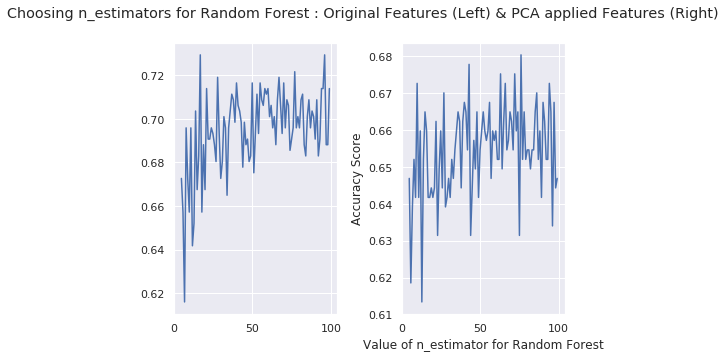

In [126]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# original features
scores,scores_list,max_score_fea,max_k_fea={},[],0,0
for k in range(5,100):
  model = RandomForestClassifier(n_estimators=k,min_samples_split=dt_split_fea,
                                 criterion="entropy")
  model.fit(train_fea,train_label)
  predicted_label=model.predict(valid_fea)
  scores[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores[k]>max_score_fea and k!=1):
    max_score_fea=scores[k]
    max_k_fea=k
  scores_list.append(scores[k])
  
# PCA applied features
scores_pca,scores_list_pca,max_score_pca,max_k_pca={},[],0,0
for k in range(5,100):
  model = RandomForestClassifier(n_estimators=k,min_samples_split=dt_split_pca,
                                 criterion="entropy")
  model.fit(train_pca,train_label)
  predicted_label=model.predict(valid_pca)
  scores_pca[k]=metrics.accuracy_score(valid_label,predicted_label)
  if(scores_pca[k]>max_score_pca and k!=1):
    max_score_pca=scores_pca[k]
    max_k_pca=k
  scores_list_pca.append(scores_pca[k])

  
fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(wspace = 0.4)
fig.suptitle('Choosing n_estimators for Random Forest : Original Features (Left) & PCA applied Features (Right)')
ax1.plot(range(5,100), scores_list)
ax2.plot(range(5,100),scores_list_pca)
plt.xlabel("Value of n_estimator for Random Forest")
plt.ylabel("Accuracy Score")

'entropy' gives better result that 'gini', hence going with 'entropy'.

In [127]:
print("We will choose n_estimators = ",max_k_fea," for original features as the score is highest against it.")
print("We will choose n_estimators = ",max_k_pca," for PCA applied features as the score is highest against it.")

We will choose n_estimators =  17  for original features as the score is highest against it.
We will choose n_estimators =  76  for PCA applied features as the score is highest against it.


In [128]:
print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_fea,min_samples_split=dt_split_fea,
                                 criterion="entropy")
model.fit(train_fea,train_label)
predicted_valid_label=model.predict(valid_fea)
print("Validation Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label,predicted_valid_label))
show_fscore(valid_label,predicted_valid_label)

print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_pca,min_samples_split=dt_split_pca,
                                 criterion="entropy")
model.fit(train_pca, train_label)
predicted_valid_labels = model.predict(valid_pca)
print("Validation Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(valid_label, predicted_valid_labels))
show_fscore(valid_label,predicted_valid_labels)

-------------------------------------------
Validation Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6907216494845361
The FScore of the 7 labels are as follows:
Class  0  :  0.4347826086956521
Class  1  :  0.8333333333333334
Class  2  :  0.9115646258503401
Class  3  :  0.923076923076923
Class  4  :  0.42857142857142855
Class  5  :  0.5039370078740157
Class  6  :  0.6566265060240964
Average FScore :  0.6702703476322556
-------------------------------------------
Validation Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6597938144329897
The FScore of the 7 labels are as follows:
Class  0  :  0.2926829268292683
Class  1  :  0.7500000000000001
Class  2  :  0.918918918918919
Class  3  :  0.6956521739130435
Class  4  :  0.7058823529411764
Class  5  :  0.5142857142857143
Class  6  :  0.6238532110091743
Average FScore :  0.6430393282710423


In [129]:
print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_fea,min_samples_split=dt_split_fea,
                                 criterion="entropy")
model.fit(train_fea,train_label)
predicted_test_label=model.predict(test_fea)
print("Testing Results from original features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label,predicted_test_label))
show_fscore(test_label,predicted_test_label)

print("-------------------------------------------")
model = RandomForestClassifier(n_estimators=max_k_pca,min_samples_split=dt_split_pca,
                                 criterion="entropy")
model.fit(train_pca, train_label)
predicted_test_labels = model.predict(test_pca)
print("Testing Results from PCA applied features dataset:")
print("-------------------------------------------")
print("Accuracy Score : ",metrics.accuracy_score(test_label, predicted_test_labels))
show_fscore(test_label,predicted_test_labels)

-------------------------------------------
Testing Results from original features dataset:
-------------------------------------------
Accuracy Score :  0.6632390745501285
The FScore of the 7 labels are as follows:
Class  0  :  0.33962264150943394
Class  1  :  0.6885245901639345
Class  2  :  0.9239766081871345
Class  3  :  0.8571428571428571
Class  4  :  0.22222222222222224
Class  5  :  0.4545454545454546
Class  6  :  0.654320987654321
Average FScore :  0.5914793373464796
-------------------------------------------
Testing Results from PCA applied features dataset:
-------------------------------------------
Accuracy Score :  0.6863753213367609
The FScore of the 7 labels are as follows:
Class  0  :  0.3181818181818182
Class  1  :  0.7692307692307692
Class  2  :  0.8987341772151899
Class  3  :  0.56
Class  4  :  0.7272727272727273
Class  5  :  0.5405405405405406
Class  6  :  0.6911314984709481
Average FScore :  0.6435845044159991
